In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import json

In [54]:
path1 = ("Resources/filtered_covid.csv")
path2 = ("Resources/real_estate19.csv")
path3 = ("Resources/real_estate20.csv")

covid= pd.read_csv(path1)
rs_19= pd.read_csv(path2)
rs_20= pd.read_csv(path3)

In [55]:
covid = covid[(covid['YEAR']==2020) & (covid['MONTH']>5)]
covid

,GENDER,AGEGRP,DATE,COVID_COUNT,COUNTY_NAME,YEAR,MONTH,DAY,MONTH_NAME
5,F,0-19,2020-06-11 00:00:00,1,Boone,2020,6,11,June
6,F,0-19,2020-06-19 00:00:00,1,Boone,2020,6,19,June
7,F,0-19,2020-06-20 00:00:00,1,Boone,2020,6,20,June
8,F,0-19,2020-06-22 00:00:00,1,Boone,2020,6,22,June
9,F,0-19,2020-06-25 00:00:00,1,Boone,2020,6,25,June
...,...,...,...,...,...,...,...,...,...
19438,Unknown,Unknown,2020-08-25 00:00:00,1,Marion,2020,8,25,August
19439,Unknown,Unknown,2020-08-26 00:00:00,1,Marion,2020,8,26,August
19440,Unknown,Unknown,2020-10-24 00:00:00,1,Marion,2020,10,24,October
19441,Unknown,Unknown,2020-11-13 00:00:00,1,Marion,2020,11,13,November


In [56]:
covid_county_count= covid.groupby("COUNTY_NAME")["COVID_COUNT"].sum()
covid_county_count

COUNTY_NAME
Boone         4228
Hamilton     23086
Hancock       4886
Hendricks    10502
Johnson      11150
Marion       61713
Name: COVID_COUNT, dtype: int64

In [77]:
covid_month_county= covid.groupby("MONTH_NAME")["COVID_COUNT"].sum()
covid_month_county

covid_month_county = pd.DataFrame(covid_month_county)
covid_month_county

,COVID_COUNT
MONTH_NAME,
August,6877
December,48027
July,5314
June,2452
November,36572
October,10884
September,5439


In [59]:
covid_month_stats= covid.groupby(["COUNTY_NAME", "MONTH"])["COVID_COUNT"].sum()
covid_month_stats.head()

COUNTY_NAME  MONTH
Boone        6        108
             7        206
             8        219
             9        163
             10       417
Name: COVID_COUNT, dtype: int64

In [60]:
covid_county_df= pd.DataFrame(covid_county_count)
covid_county_df

,COVID_COUNT
COUNTY_NAME,
Boone,4228
Hamilton,23086
Hancock,4886
Hendricks,10502
Johnson,11150
Marion,61713


In [61]:
covid_month_df= pd.DataFrame(covid_month_stats)
covid_month_df.head()

COVID_COUNT
COUNTY_NAME MONTH             
Boone       6              108
            7              206
            8              219
            9              163
            10             417

In [62]:
#Getting mean values, and inserting into DataFrames
rs_19_mean= rs_19.groupby("MONTH")["ListPrice"].mean()
rs_20_mean= rs_20.groupby("MONTH")["ListPrice"].mean()

rs_19_price_df= pd.DataFrame(rs_19_mean)
rs_19_price_df = rs_19_price_df.rename(columns={"ListPrice": "2019 Price"})
                                    

rs_20_price_df= pd.DataFrame(rs_20_mean)
rs_20_price_df = rs_20_price_df.rename(columns={"ListPrice": "2020 Price"})

#Combining Real Estate into single DataFrame
rs_combined_price = pd.merge(rs_19_price_df,rs_20_price_df, on="MONTH")
rs_combined_price

#Formatting for currency
rs_combined_price = rs_combined_price.round(decimals = 2)
rs_combined_price

,2019 Price,2020 Price
MONTH,,
6,234036.04,284110.68
7,233241.49,280252.04
8,221376.34,266243.75
9,213293.07,252501.72
10,189435.05,239411.54
11,209368.01,235463.85
12,267263.87,278015.52


In [113]:
#Looking at counties
rs19_county_mean= rs_19.groupby(["County", "MONTH"])["ListPrice"].mean()
rs20_county_mean= rs_20.groupby(["County", "MONTH"])["ListPrice"].mean()

rs19_county_df= pd.DataFrame(rs19_county_mean)
rs19_county_df = rs19_county_df.rename(columns={"ListPrice": "2019 Price"})
rs19_county_df

rs20_county_df= pd.DataFrame(rs20_county_mean)
rs20_county_df = rs20_county_df.rename(columns={"ListPrice": "2020 Price"})
rs20_county_df

rs_combined_county = pd.merge(rs19_county_df,rs20_county_df, on=["MONTH", "County"])
rs_combined_county

#Formatting for currency
rs_combined_county = rs_combined_county.round(decimals = 2)
rs_combined_county.head()

,,2019 Price,2020 Price
MONTH,County,,
6,Boone,388336.03,415895.80
7,Boone,302653.16,363381.13
8,Boone,304809.97,400380.03
9,Boone,288279.03,383739.58
10,Boone,381970.16,347987.95


In [74]:
rs_19_month = rs_19.groupby(['MONTH']).count()
rs_20_month = rs_20.groupby(['MONTH']).count()
rs_20_month

,MLSNumber,ListPrice,ListingContractDate,County,YEAR,MONTH_NAME
MONTH,,,,,,
6,3255,3255,3255,3255,3255,3255
7,3541,3541,3541,3541,3541,3541
8,3460,3460,3460,3460,3460,3460
9,4512,4512,4512,4512,4512,4512
10,4638,4638,4638,4638,4638,4638
11,2552,2552,2552,2552,2552,2552
12,977,977,977,977,977,977


In [64]:
rs19_monthly_count= rs_19.groupby(["County", "MONTH"])["MLSNumber"].count()
rs19_monthly_count = pd.DataFrame(rs19_monthly_count)
rs19_monthly_count = rs19_monthly_count.rename(columns={"MLSNumber": "2019 Listings"})
rs19_monthly_count

rs20_monthly_count= rs_20.groupby(["County", "MONTH"])["MLSNumber"].count()
rs20_monthly_count = pd.DataFrame(rs20_monthly_count)
rs20_monthly_count = rs20_monthly_count.rename(columns={"MLSNumber": "2020 Listings"})
rs20_monthly_count

#Combining into singular DataFrame
rs_combined_listing = pd.merge(rs19_monthly_count,rs20_monthly_count, on=["MONTH", "County"])
rs_combined_listing.head()

,,2019 Listings,2020 Listings
MONTH,County,,
6,Boone,117,155
7,Boone,101,144
8,Boone,96,108
9,Boone,80,118
10,Boone,62,84


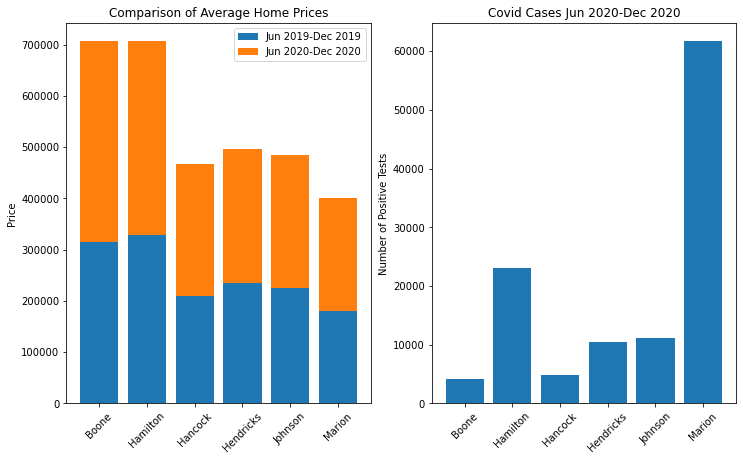

In [112]:
covid = covid_county_df
county_avg_19 = rs_combined_county.groupby('County')['2019 Price'].mean()
county_avg_20 = rs_combined_county.groupby('County')['2020 Price'].mean()

x_axis = list(covid.index)
fig, ax = plt.subplots(1, 2, figsize=(12,7), sharex=True, sharey=False)

p1=ax[0].bar(x_axis, county_avg_19)
p2=ax[0].bar(x_axis, county_avg_20, bottom=county_avg_19)

ax[0].set_title('Comparison of Average Home Prices')
ax[0].set_ylabel('Price')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].legend((p1[0], p2[0]), ('Jun 2019-Dec 2019', 'Jun 2020-Dec 2020'))

p3=ax[1].bar(x_axis, covid['COVID_COUNT'])
ax[1].set_title('Covid Cases Jun 2020-Dec 2020')
ax[1].set_ylabel('Number of Positive Tests')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].legend

plt.show()

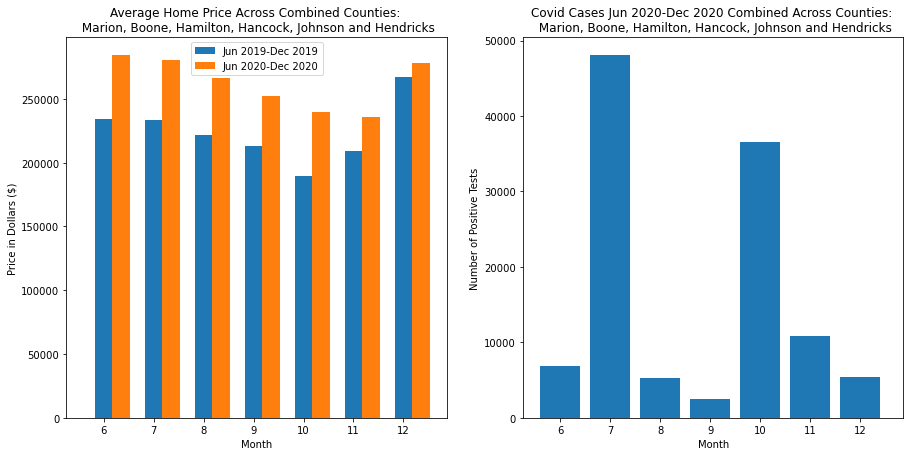

In [197]:
covid = covid_month_county
price_19 = rs_combined_price['2019 Price']
price_20 = rs_combined_price['2020 Price']

x_axis1 = covid_month_county.index
x_axis2 = rs_combined_price.index
fig, ax = plt.subplots(1, 2, figsize=(15,7), sharex=True, sharey=False)
width=0.35

p1=ax[0].bar(x_axis2, price_19.values, width)
p2=ax[0].bar(x_axis2+width, price_20.values, width)

ax[0].set_title('Average Home Price Across Combined Counties: \n Marion, Boone, Hamilton, Hancock, Johnson and Hendricks')
ax[0].set_ylabel('Price in Dollars ($)')
ax[0].set_xlabel('Month')
ax[0].legend((p1[0], p2[0]), ('Jun 2019-Dec 2019', 'Jun 2020-Dec 2020'))

p3=ax[1].bar(x_axis2, covid['COVID_COUNT'])
ax[1].set_title('Covid Cases Jun 2020-Dec 2020 Combined Across Counties: \n Marion, Boone, Hamilton, Hancock, Johnson and Hendricks')
ax[1].set_ylabel('Number of Positive Tests')
ax[1].set_xlabel('Month')
ax[1].legend

plt.savefig('output/price_covid.png')

plt.show()

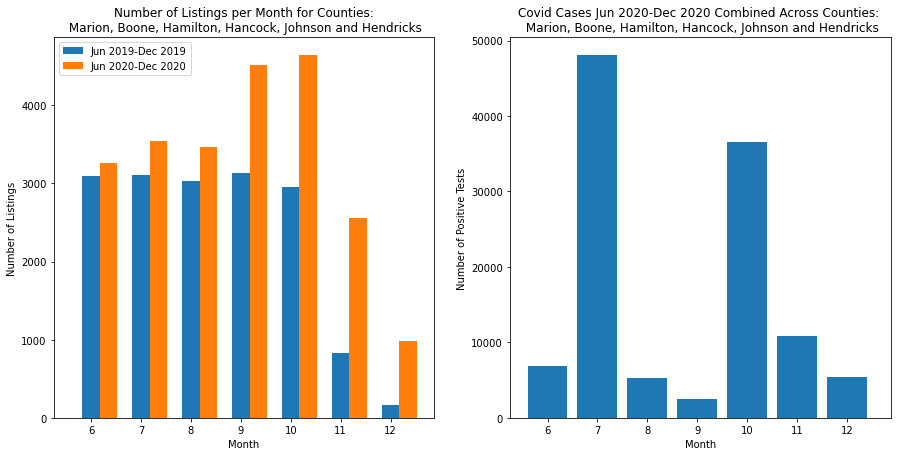

In [198]:
covid = covid_month_county
price_19 = rs_19_month['MLSNumber']
price_20 = rs_20_month['MLSNumber']

x_axis1 = covid_county_df.index
x_axis2 = rs_19_month.index

width=0.35

fig, ax = plt.subplots(1, 2, figsize=(15,7), sharex=True, sharey=False)

p1=ax[0].bar(x_axis2, price_19, width)
p2=ax[0].bar(x_axis2 + width, price_20, width)

ax[0].set_title('Number of Listings per Month for Counties:\n Marion, Boone, Hamilton, Hancock, Johnson and Hendricks')
ax[0].set_ylabel('Number of Listings')
ax[0].set_xlabel('Month')
ax[0].legend((p1[0], p2[0]), ('Jun 2019-Dec 2019', 'Jun 2020-Dec 2020'))

p3=ax[1].bar(x_axis2, covid['COVID_COUNT'])
ax[1].set_title('Covid Cases Jun 2020-Dec 2020 Combined Across Counties: \n Marion, Boone, Hamilton, Hancock, Johnson and Hendricks')
ax[1].set_ylabel('Number of Positive Tests')
ax[1].set_xlabel('Month')
ax[1].legend

plt.savefig('output/listings_covid.png')
plt.show()

In [154]:
final_rs = rs_combined_listing.reset_index()

final_covid = covid_month_df.reset_index()
final_covid = final_covid.rename(columns={'COUNTY_NAME': 'County',
                                         'COVID_COUNT':'Covid Count'})
final_df = final_covid.merge(final_rs, on=['County', 'MONTH'])
final_df.head(7)

,County,MONTH,Covid Count,2019 Listings,2020 Listings
0,Boone,6,108,117,155
1,Boone,7,206,101,144
2,Boone,8,219,96,108
3,Boone,9,163,80,118
4,Boone,10,417,62,84
5,Boone,11,1338,17,61
6,Boone,12,1777,6,38
